#### Pre-processing and Visualization

In [1]:
import pandas
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv('./stackOverflow.csv', encoding = 'utf-8')

In [3]:
data

,Unnamed: 0,qid,i,qs,qt,tags,qvc,qac,aid,j,as,at
0,1,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563372,67183.0,2,1235000501
1,2,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563374,66554.0,0,1235000551
2,3,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563358,15842.0,3,1235000177
3,4,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563413,893.0,18,1235001545
4,5,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563454,11649.0,4,1235002457
5,6,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563472,50742.0,6,1235002809
6,7,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563484,8899.0,1,1235003266
7,8,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563635,60190.0,12,1235007817
8,9,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563642,65235.0,1,1235007913
9,10,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,564028,32797.0,8,1235020626


#### 1. Find out the number of questions asked with respect to the given tags.

In [4]:
tag_question_map = dict()

for question_id, tags_list in zip(list(data['qid']), list(data['tags'])):
    tags_list = tags_list.split(',')

    for tag in tags_list:
        if tag in tag_question_map.keys():
            tag_question_map[tag].add(question_id)
        else:
            tag_question_map[tag] = set([question_id])

In [5]:
question1_answer = []
tag_counts = [0, 0, 0, 0, 0]
question1_answer.append('tag,number_of_questions\n')

for tag, questions in sorted(tag_question_map.items(), key = lambda x: x[0]):
    question1_answer.append('{},{}\n'.format(tag, len(questions)))

    if len(questions) < 2:
        tag_counts[0] += 1
    elif len(questions) < 20:
        tag_counts[1] += 1
    elif len(questions) < 200:
        tag_counts[2] += 1
    elif len(questions) < 2000:
        tag_counts[3] += 1
    else:
        tag_counts[4] += 1

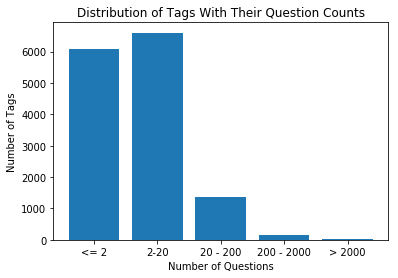

In [6]:
index = [0, 1, 2, 3, 4]
plt.bar(index, tag_counts)
plt.xlabel('Number of Questions', fontsize = 10)
plt.ylabel('Number of Tags', fontsize = 10)
plt.xticks(index, ['<= 2', '2-20', '20 - 200', '200 - 2000', '> 2000'], fontsize = 10)
plt.title('Distribution of Tags With Their Question Counts')
plt.show()

In [7]:
question1_answer

['tag,number_of_questions\n',
 '100-continue,2\n',
 '10g,1\n',
 '11g,1\n',
 '12,1\n',
 '128-bit,1\n',
 '12bit,1\n',
 '141,1\n',
 '16bit,3\n',
 '2005,2\n',
 '2007,1\n',
 '2008,9\n',
 '2009,1\n',
 '2038,1\n',
 '24-bit,2\n',
 '2d,37\n',
 '2d-array,8\n',
 '2û0,20\n',
 '2û3û2,2\n',
 '2û5û2,1\n',
 '3,4\n',
 '3-tier,4\n',
 '301,9\n',
 '301-redirect,14\n',
 '304,2\n',
 '32bit,29\n',
 '37-signals,1\n',
 '3d,98\n',
 '3d-games,1\n',
 '3d-studio,1\n',
 '3dcamera,2\n',
 '3dgraphics,15\n',
 '3dxml,1\n',
 '3gp,3\n',
 '3nf,2\n',
 '3rd-party-controls,1\n',
 '3rd-party-library,4\n',
 '3rdparty,1\n',
 '3û0,8\n',
 '3û5,26\n',
 '401,4\n',
 '404,33\n',
 '4d,2\n',
 '4gl,1\n',
 '4k,1\n',
 '4nf,1\n',
 '4û0,1\n',
 '500,1\n',
 '500-error,5\n',
 '503,2\n',
 '5th-generation-langs,1\n',
 '5û0û12,1\n',
 '64bit,78\n',
 '68hc12,1\n',
 '7zip,1\n',
 '80-column,1\n',
 '8051,2\n',
 '9,1\n',
 '960,3\n',
 '9û0,1\n',
 'a-records,1\n',
 'a-star,5\n',
 'a2p,1\n',
 'a4j,3\n',
 'aac,2\n',
 'aam,1\n',
 'aasm,4\n',
 'ab-testing,3\

#### 2. Find out the most commonly used tags and the trend in Data Science tags.

In [8]:
question2_answer = []
labels = []
data_science = ['python', 'sql', 'excel', 'matlab', 'sas', 'r']
trend = [0, 0, 0, 0, 0, 0]
question_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
question2_answer.append('tag,number_of_questions\n')
i = 0

for tag, questions in sorted(tag_question_map.items(), key = lambda x: -len(x[1])):
    if i < 10:
        labels.append(tag)
        question_counts[i] = len(questions)
        i += 1

    if tag in data_science:
        trend[data_science.index(tag)] = len(questions)

    question2_answer.append('{},{}\n'.format(tag, len(questions)))

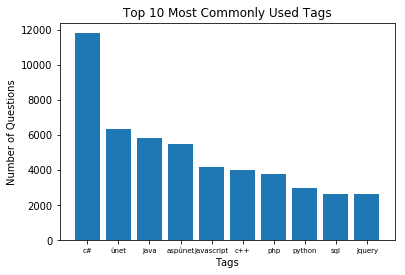

In [9]:
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(index, question_counts)
plt.xlabel('Tags', fontsize = 10)
plt.ylabel('Number of Questions', fontsize = 10)
plt.xticks(index, labels, fontsize = 7)
plt.title('Top 10 Most Commonly Used Tags')
plt.show()

In [10]:
question2_answer

['tag,number_of_questions\n',
 'c#,11793\n',
 'ûnet,6328\n',
 'java,5800\n',
 'aspûnet,5459\n',
 'javascript,4168\n',
 'c++,4011\n',
 'php,3771\n',
 'python,3004\n',
 'sql,2663\n',
 'jquery,2618\n',
 'sqlserver,2353\n',
 'iphone,2246\n',
 'html,1944\n',
 'mysql,1809\n',
 'wpf,1740\n',
 'aspûnet-mvc,1720\n',
 'c,1673\n',
 'windows,1596\n',
 'best-practices,1563\n',
 'css,1359\n',
 'objective-c,1315\n',
 'vbûnet,1303\n',
 'ruby,1301\n',
 'subjective,1277\n',
 'database,1270\n',
 'xml,1218\n',
 'visualstudio,1140\n',
 'rails,1073\n',
 'winforms,1057\n',
 'linux,1000\n',
 'regex,993\n',
 'ajax,962\n',
 'linq,958\n',
 'iphone-sdk,946\n',
 'visualstudio2008,916\n',
 'not-programming-related,911\n',
 'web-development,905\n',
 'rubyonrails,863\n',
 'sqlserver2005,827\n',
 'django,806\n',
 'cocoa-touch,802\n',
 'cocoa,743\n',
 'wcf,740\n',
 'beginner,726\n',
 'performance,719\n',
 'flex,706\n',
 'security,683\n',
 'flash,667\n',
 'delphi,664\n',
 'algorithm,643\n',
 'sharepoint,639\n',
 'linqto

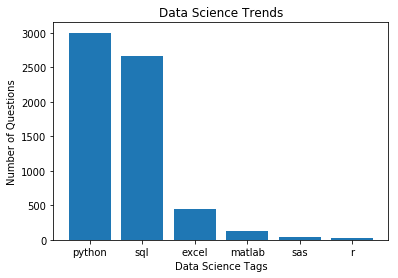

In [11]:
index = [0, 1, 2, 3, 4, 5]
plt.bar(index, trend)
plt.xlabel('Data Science Tags', fontsize = 10)
plt.ylabel('Number of Questions', fontsize = 10)
plt.xticks(index, data_science, fontsize = 10)
plt.title('Data Science Trends')
plt.show()

#### 3. Find out the average time taken to answer a question.

In [12]:
average_answer_time = (data['at'] - data['qt']).mean()
question3_answer = ['{}\n'.format(average_answer_time)]

print('Average time taken to answer a question (considering all answers): {}s'.format(average_answer_time))

Average time taken to answer a question (considering all answers): 133765.87433786143s


#### 4. Find out the number of views related to the number of answers.

In [13]:
view_vs_answer = [(view, answer) for _, view, answer in (set(zip(data['qid'], data['qvc'], data['qac'])))]

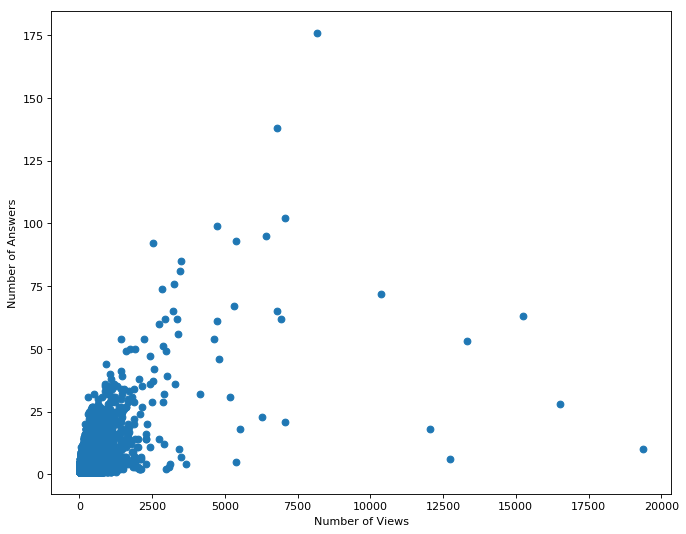

In [14]:
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.xlabel('Number of Views')
plt.ylabel('Number of Answers')
plt.scatter(*zip(*view_vs_answer))
plt.savefig("q1_4.png")
plt.show()

#### 5. Find out the tags with highest / lowest rating in questions. <br> 6. Find out the tags with highest / lowest rating in answers.

In [15]:
# (qid, score)
tag_max_question_rating_map = dict()
tag_min_question_rating_map = dict()
# (aid, score)
tag_max_answer_rating_map = dict()
tag_min_answer_rating_map = dict()

for question_id, answer_id, tags_list, question_score, answer_score in zip(list(data['qid']), list(data['aid']), list(data['tags']), list(data['qs']), list(data['as'])):
    tags_list = tags_list.split(',')

    for tag in tags_list:
        if tag in tag_max_question_rating_map.keys():
            if tag_max_question_rating_map[tag][1] < question_score:
                tag_max_question_rating_map[tag] = (question_id, question_score)
            if tag_min_question_rating_map[tag][1] > question_score:
                tag_min_question_rating_map[tag] = (question_id, question_score)
            if tag_max_answer_rating_map[tag][1] < answer_score:
                tag_max_answer_rating_map[tag] = (answer_id, answer_score)
            if tag_min_answer_rating_map[tag][1] > answer_score:
                tag_min_answer_rating_map[tag] = (answer_id, answer_score)
        else:
            tag_max_question_rating_map[tag] = (question_id, question_score)
            tag_min_question_rating_map[tag] = (question_id, question_score)
            tag_max_answer_rating_map[tag] = (answer_id, answer_score)
            tag_min_answer_rating_map[tag] = (answer_id, answer_score)

In [16]:
tag_max_question_rating = sorted(tag_max_question_rating_map.items(), key = lambda x: -x[1][1])[:3]
tag_min_question_rating = sorted(tag_min_question_rating_map.items(), key = lambda x: x[1][1])[:3]

In [17]:
question5_answer = []
question5_answer.append('tag,qid_highest,highest_question_rating,qid_lowest,lowest_question_rating\n')

for tag in sorted(tag_max_question_rating_map.keys()):
    question5_answer.append('{},{},{},{},{}\n'.format(tag,
                                                      tag_max_question_rating_map[tag][0],
                                                      tag_max_question_rating_map[tag][1],
                                                      tag_min_question_rating_map[tag][0],
                                                      tag_min_question_rating_map[tag][1],))

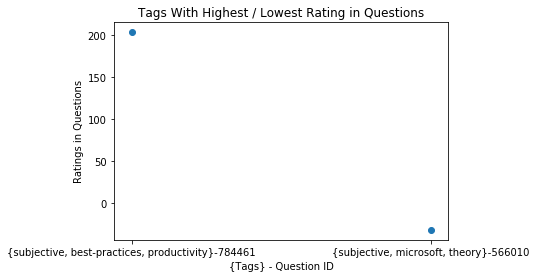

In [18]:
index = [0, 1]
plt.scatter(index, [tag_max_question_rating[0][1][1], tag_min_question_rating[0][1][1]])
plt.xlabel('{Tags} - Question ID', fontsize = 10)
plt.ylabel('Ratings in Questions', fontsize = 10)
plt.xticks(index, ['{' + tag_max_question_rating[0][0] + ', ' + tag_max_question_rating[1][0] + ', ' +
                   tag_max_question_rating[2][0] + '}-' + str(tag_max_question_rating[0][1][0]),
                   '{' + tag_min_question_rating[0][0] + ', ' + tag_min_question_rating[1][0] + ', ' +
                   tag_min_question_rating[2][0] + '}-' + str(tag_min_question_rating[0][1][0])], fontsize = 10)
plt.title('Tags With Highest / Lowest Rating in Questions')
plt.show()

In [19]:
question5_answer

['tag,qid_highest,highest_question_rating,qid_lowest,lowest_question_rating\n',
 '100-continue,879120,2,848378,0\n',
 '10g,589043,1,589043,1\n',
 '11g,704272,0,704272,0\n',
 '12,903994,2,903994,2\n',
 '128-bit,741301,1,741301,1\n',
 '12bit,832932,4,832932,4\n',
 '141,769564,1,769564,1\n',
 '16bit,960158,3,755447,0\n',
 '2005,811940,3,949435,0\n',
 '2007,852068,0,852068,0\n',
 '2008,811940,3,703074,0\n',
 '2009,904356,7,904356,7\n',
 '2038,839755,4,839755,4\n',
 '24-bit,742236,2,839257,0\n',
 '2d,667034,9,585879,0\n',
 '2d-array,732684,4,766590,0\n',
 '2û0,666056,3,665336,-3\n',
 '2û3û2,663893,2,679313,1\n',
 '2û5û2,680207,0,680207,0\n',
 '3,806118,0,806118,0\n',
 '3-tier,907240,3,838236,1\n',
 '301,686017,2,696446,0\n',
 '301-redirect,686017,2,569402,0\n',
 '304,691318,1,924456,0\n',
 '32bit,589057,5,595049,0\n',
 '37-signals,619192,1,619192,1\n',
 '3d,720578,8,586232,0\n',
 '3d-games,928925,3,928925,3\n',
 '3d-studio,757145,0,757145,0\n',
 '3dcamera,754060,1,754060,1\n',
 '3dgraphics,

In [20]:
tag_max_answer_rating = sorted(tag_max_answer_rating_map.items(), key = lambda x: -x[1][1])[:3]
tag_min_answer_rating = sorted(tag_min_answer_rating_map.items(), key = lambda x: x[1][1])[:3]

In [21]:
question6_answer = []
question6_answer.append('tag,aid_highest,highest_answer_rating,aid_lowest,lowest_answer_rating\n')

for tag in sorted(tag_max_question_rating_map.keys()):
    question6_answer.append('{},{},{},{},{}\n'.format(tag,
                                                      tag_max_answer_rating_map[tag][0],
                                                      tag_max_answer_rating_map[tag][1],
                                                      tag_min_answer_rating_map[tag][0],
                                                      tag_min_answer_rating_map[tag][1],))

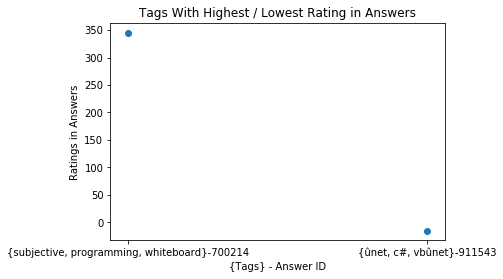

In [22]:
index = [0, 1]
plt.scatter(index, [tag_max_answer_rating[0][1][1], tag_min_answer_rating[0][1][1]])
plt.xlabel('{Tags} - Answer ID', fontsize = 10)
plt.ylabel('Ratings in Answers', fontsize = 10)
plt.xticks(index, ['{' + tag_max_answer_rating[0][0] + ', ' + tag_max_answer_rating[1][0] + ', ' +
                   tag_max_answer_rating[2][0] + '}-' + str(tag_max_answer_rating[0][1][0]),
                   '{' + tag_min_answer_rating[0][0] + ', ' + tag_min_answer_rating[1][0] + ', ' +
                   tag_min_answer_rating[2][0] + '}-' + str(tag_min_answer_rating[0][1][0])], fontsize = 10)
plt.title('Tags With Highest / Lowest Rating in Answers')
plt.show()

In [23]:
question6_answer

['tag,aid_highest,highest_answer_rating,aid_lowest,lowest_answer_rating\n',
 '100-continue,848707,3,848652,-1\n',
 '10g,589053,3,589051,0\n',
 '11g,704288,0,704288,0\n',
 '12,904120,2,904079,0\n',
 '128-bit,741371,10,741336,0\n',
 '12bit,833649,1,832977,0\n',
 '141,769601,1,776307,0\n',
 '16bit,684543,6,684560,-1\n',
 '2005,811957,1,811990,0\n',
 '2007,852138,4,852138,4\n',
 '2008,811957,1,928569,-1\n',
 '2009,904369,2,904368,0\n',
 '2038,839826,5,839830,3\n',
 '24-bit,742387,3,839319,0\n',
 '2d,667090,9,567242,-2\n',
 '2d-array,789657,10,684467,0\n',
 '2û0,734935,4,564945,0\n',
 '2û3û2,887772,1,683458,0\n',
 '2û5û2,680222,4,680226,-1\n',
 '3,806881,2,813919,0\n',
 '3-tier,858627,2,868848,0\n',
 '301,934343,4,643527,0\n',
 '301-redirect,748147,4,696248,0\n',
 '304,691348,4,928623,0\n',
 '32bit,783669,9,882105,-1\n',
 '37-signals,619302,1,619302,1\n',
 '3d,849450,9,916693,-2\n',
 '3d-games,928934,6,928939,-1\n',
 '3d-studio,757186,2,757186,2\n',
 '3dcamera,754158,1,754088,0\n',
 '3dgrap

#### 7. Find out the most active / inactive in answering the questions.

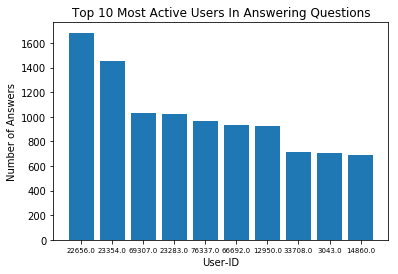

In [24]:
from collections import Counter

question7_answer = []
question7_answer.append('Top 10 Most Active Users In Answering Questions:\n')
sorted_answer_counts = Counter(data['j']).most_common()
user_ids = []
answer_counts = []

for user, answer_count in sorted_answer_counts[:10]:
    user_ids.append(user)
    answer_counts.append(answer_count)
    question7_answer.append("User-ID: {}, Number of Answers: {}\n".format(user, answer_count))

index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(index, answer_counts)
plt.xlabel('User-ID', fontsize = 10)
plt.ylabel('Number of Answers', fontsize = 10)
plt.xticks(index, user_ids, fontsize = 7)
plt.title('Top 10 Most Active Users In Answering Questions')
plt.show()

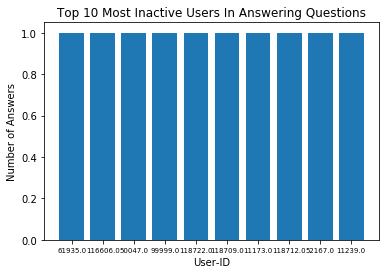

In [25]:
question7_answer.append('\nTop 10 Most Inactive Users In Answering Questions:\n')
user_ids = []
answer_counts = []

for user, answer_count in sorted_answer_counts[-10:][::-1]:
    user_ids.append(user)
    answer_counts.append(answer_count)
    question7_answer.append("User-ID: {}, Number of Answers: {}\n".format(user, answer_count))

plt.bar(index, answer_counts)
plt.xlabel('User-ID', fontsize = 10)
plt.ylabel('Number of Answers', fontsize = 10)
plt.xticks(index, user_ids, fontsize = 7)
plt.title('Top 10 Most Inactive Users In Answering Questions')
plt.show()

In [26]:
question7_answer

['Top 10 Most Active Users In Answering Questions:\n',
 'User-ID: 22656.0, Number of Answers: 1683\n',
 'User-ID: 23354.0, Number of Answers: 1457\n',
 'User-ID: 69307.0, Number of Answers: 1033\n',
 'User-ID: 23283.0, Number of Answers: 1024\n',
 'User-ID: 76337.0, Number of Answers: 967\n',
 'User-ID: 66692.0, Number of Answers: 935\n',
 'User-ID: 12950.0, Number of Answers: 926\n',
 'User-ID: 33708.0, Number of Answers: 716\n',
 'User-ID: 3043.0, Number of Answers: 708\n',
 'User-ID: 14860.0, Number of Answers: 688\n',
 '\nTop 10 Most Inactive Users In Answering Questions:\n',
 'User-ID: 61935.0, Number of Answers: 1\n',
 'User-ID: 116606.0, Number of Answers: 1\n',
 'User-ID: 50047.0, Number of Answers: 1\n',
 'User-ID: 99999.0, Number of Answers: 1\n',
 'User-ID: 118722.0, Number of Answers: 1\n',
 'User-ID: 118709.0, Number of Answers: 1\n',
 'User-ID: 11173.0, Number of Answers: 1\n',
 'User-ID: 118712.0, Number of Answers: 1\n',
 'User-ID: 52167.0, Number of Answers: 1\n',
 'Us

#### 8. Find out the tags which draw the highest / lowest views.

In [27]:
# (qid, qvc)
tag_max_viewcount_map = dict()
tag_min_viewcount_map = dict()

for question_id, question_viewcount, tags_list in zip(list(data['qid']), list(data['qvc']), list(data['tags'])):
    tags_list = tags_list.split(',')

    for tag in tags_list:
        if tag in tag_max_viewcount_map.keys():
            if tag_max_viewcount_map[tag][1] < question_viewcount:
                tag_max_viewcount_map[tag] = (question_id, question_viewcount)
            if tag_min_viewcount_map[tag][1] > question_viewcount:
                tag_min_viewcount_map[tag] = (question_id, question_viewcount)
        else:
            tag_max_viewcount_map[tag] = (question_id, question_viewcount)
            tag_min_viewcount_map[tag] = (question_id, question_viewcount)

In [28]:
tag_max_viewcount = sorted(tag_max_viewcount_map.items(), key = lambda x: -x[1][1])[0]
tag_min_viewcount = sorted(tag_min_viewcount_map.items(), key = lambda x: x[1][1])[:2]

In [29]:
question8_answer = []
question8_answer.append('tag,qid_highest,highest_question_viewcount,qid_lowest,lowest_question_viewcount\n')

for tag in sorted(tag_max_viewcount_map.keys()):
    question8_answer.append('{},{},{},{},{}\n'.format(tag,
                                                      tag_max_viewcount_map[tag][0],
                                                      tag_max_viewcount_map[tag][1],
                                                      tag_min_viewcount_map[tag][0],
                                                      tag_min_viewcount_map[tag][1]))

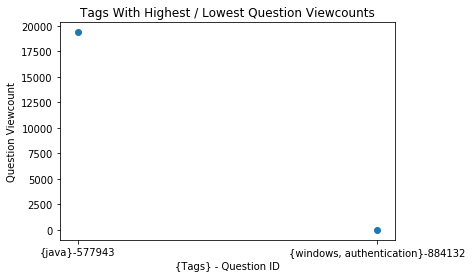

In [30]:
index = [0, 1]
plt.scatter(index, [tag_max_viewcount[1][1], tag_min_viewcount[0][1][1]])
plt.xlabel('{Tags} - Question ID', fontsize = 10)
plt.ylabel('Question Viewcount', fontsize = 10)
plt.xticks(index, ['{' + tag_max_viewcount[0] + '}-' + str(tag_max_viewcount[1][0]),
                   '{' + tag_min_viewcount[0][0] + ', ' + tag_min_viewcount[1][0] + 
                   '}-' + str(tag_min_viewcount[0][1][0])], fontsize = 10)
plt.title('Tags With Highest / Lowest Question Viewcounts')
plt.show()

In [31]:
question8_answer

['tag,qid_highest,highest_question_viewcount,qid_lowest,lowest_question_viewcount\n',
 '100-continue,848378,91,879120,68\n',
 '10g,589043,366,589043,366\n',
 '11g,704272,26,704272,26\n',
 '12,903994,53,903994,53\n',
 '128-bit,741301,426,741301,426\n',
 '12bit,832932,60,832932,60\n',
 '141,769564,90,769564,90\n',
 '16bit,684540,177,755447,44\n',
 '2005,811940,139,949435,9\n',
 '2007,852068,87,852068,87\n',
 '2008,703074,203,900114,19\n',
 '2009,904356,267,904356,267\n',
 '2038,839755,142,839755,142\n',
 '24-bit,742236,758,839257,24\n',
 '2d,622471,679,903589,40\n',
 '2d-array,766590,232,817394,123\n',
 '2û0,867109,350,847737,18\n',
 '2û3û2,663893,443,679313,126\n',
 '2û5û2,680207,80,680207,80\n',
 '3,844177,87,820707,25\n',
 '3-tier,907240,102,935346,33\n',
 '301,696446,175,689139,36\n',
 '301-redirect,681869,148,959396,21\n',
 '304,691318,98,924456,22\n',
 '32bit,711472,729,918953,39\n',
 '37-signals,619192,69,619192,69\n',
 '3d,707985,694,945112,14\n',
 '3d-games,928925,132,928925,132

#### Write To Files

In [32]:
filenames = [(question1_answer, 'q1_1.csv'),
             (question2_answer, 'q1_2.csv'),
             (question3_answer, 'q1_3.csv'),
             (question5_answer, 'q1_5.csv'),
             (question6_answer, 'q1_6.csv'),
             (question7_answer, 'q1_7.txt'),
             (question8_answer, 'q1_8.csv')]

for answer_list, fname in filenames:
    with open(fname, 'w', encoding = 'utf-8') as f:
        f.writelines(answer_list)